In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [11]:
# Step 2: Load Dataset
hts = pd.read_csv('hts_dataset.csv')

# Step 3: Preprocessing
hts = hts[['Description', 'Additional Duties']].dropna()

# Convert 'Additional Duties' to binary
hts['Additional Duties Binary'] = hts['Additional Duties'].apply(lambda x: 1 if str(x).strip() != '' else 0)

In [7]:
# Tokenize Description
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(hts['Description'])

sequences = tokenizer.texts_to_sequences(hts['Description'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)

X_hts = padded_sequences
y_hts = hts['Additional Duties Binary'].values

In [8]:
# Train/Test Split
X_hts_train, X_hts_test, y_hts_train, y_hts_test = train_test_split(X_hts, y_hts, test_size=0.2, random_state=42)

# Step 4: Build Model
hts_model = keras.Sequential([
    keras.layers.Input(shape=(X_hts_train.shape[1],)),
    keras.layers.Embedding(input_dim=5000, output_dim=64),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

hts_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train Model
hts_history = hts_model.fit(X_hts_train, y_hts_train, epochs=10, validation_data=(X_hts_test, y_hts_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.3863 - val_accuracy: 1.0000 - val_loss: 0.0086
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 3.3545e-04
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 2.4841e-04 - val_accuracy: 1.0000 - val_loss: 9.9990e-05
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 9.8811e-05 - val_accuracy: 1.0000 - val_loss: 6.6814e-05
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 6.6233e-05 - val_accuracy: 1.0000 - val_loss: 5.8042e-05
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 6.0151e-05 - val_accuracy: 1.0000 - val_loss: 5.4514e-05
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 5.5411e-05 - val_accuracy: 1.0000 - val_loss: 5.2344e-05
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.00

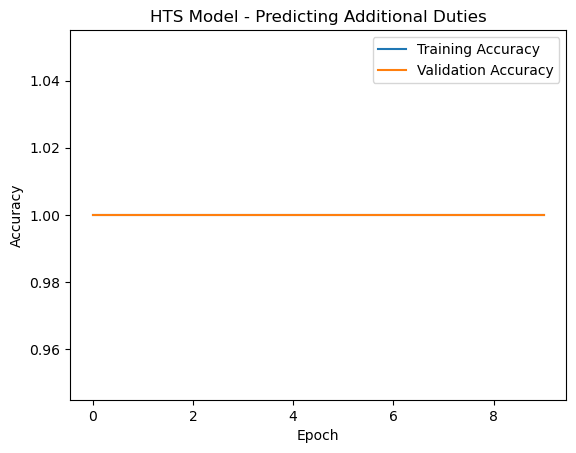


HTS Dataset - Final Validation Accuracy: 1.0


In [9]:
# Step 6: Plot Training History
plt.plot(hts_history.history['accuracy'], label='Training Accuracy')
plt.plot(hts_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('HTS Model - Predicting Additional Duties')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 7: Analysis
print("\nHTS Dataset - Final Validation Accuracy:", hts_history.history['val_accuracy'][-1])